<a href="https://colab.research.google.com/github/nitesh-singh-datascience/team-power-telecom-churn-analysis/blob/Nitesh/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:

csv_data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/Telecom Churn.csv")

In [4]:
type(csv_data)

pandas.core.frame.DataFrame

In [5]:
csv_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
description_df = csv_data.describe()
description_df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
a = csv_data.groupby('Churn')
a['Area code'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2850.0,437.074737,42.306156,408.0,408.0,415.0,510.0,510.0
True,483.0,437.817805,42.792270,408.0,408.0,415.0,510.0,510.0


In [9]:
csv_data['total_charges'] = csv_data['Total night charge'] + csv_data['Total day charge'] + csv_data['Total eve charge']
csv_data.groupby('Churn').describe()

Account length                             ... total_charges                       
               count        mean       std  min  ...           25%    50%      75%    max
Churn                                            ...                                     
False         2850.0  100.793684  39.88235  1.0  ...       49.4625  56.25  62.4175  84.68
True           483.0  102.664596  39.46782  1.0  ...       50.1900  63.96  73.8250  92.56

[2 rows x 136 columns]

In [10]:
csv_data['total_minutes'] = csv_data['Total day minutes'] + csv_data['Total eve minutes'] + csv_data['Total night minutes']
csv_data.groupby('Churn').describe()

Account length                             ... total_minutes                       
               count        mean       std  min  ...           25%    50%      75%    max
Churn                                            ...                                     
False         2850.0  100.793684  39.88235  1.0  ...       519.425  579.3  631.475  831.0
True           483.0  102.664596  39.46782  1.0  ...       535.400  635.8  714.750  876.9

[2 rows x 144 columns]

In [11]:
x = pd.DataFrame(a.describe())

In [12]:
y = pd.DataFrame()
for col in csv_data.columns:
  if col in x:
    print(col)
    print(a[col].describe(),'\n\n')

Account length
        count        mean       std  min   25%    50%    75%    max
Churn                                                              
False  2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
True    483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0 


Area code
        count        mean        std    min    25%    50%    75%    max
Churn                                                                  
False  2850.0  437.074737  42.306156  408.0  408.0  415.0  510.0  510.0
True    483.0  437.817805  42.792270  408.0  408.0  415.0  510.0  510.0 


Number vmail messages
        count      mean        std  min  25%  50%   75%   max
Churn                                                        
False  2850.0  8.604561  13.913125  0.0  0.0  0.0  22.0  51.0
True    483.0  5.115942  11.860138  0.0  0.0  0.0   0.0  48.0 


Total day minutes
        count        mean        std  min      25%    50%     75%    max
Churn                                        

In [13]:
csv_data.iloc[10]

State                        IN
Account length               65
Area code                   415
International plan           No
Voice mail plan              No
Number vmail messages         0
Total day minutes         129.1
Total day calls             137
Total day charge          21.95
Total eve minutes         228.5
Total eve calls              83
Total eve charge          19.42
Total night minutes       208.8
Total night calls           111
Total night charge          9.4
Total intl minutes         12.7
Total intl calls              6
Total intl charge          3.43
Customer service calls        4
Churn                      True
total_charges             50.77
total_minutes             566.4
Name: 10, dtype: object

In [14]:
churn_true = csv_data[csv_data['Churn'] == True]
churn_false = csv_data[csv_data['Churn'] == False]

In [15]:
churn_true.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,total_charges,total_minutes
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814,62.466418,624.555901
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275,13.887371,110.830694
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000,21.090000,311.700000
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000,50.190000,535.400000
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000,63.960000,635.800000
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000,73.825000,714.750000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000,92.560000,876.900000


In [16]:
churn_false.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,total_charges,total_minutes
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825,55.705404,574.352246
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883,9.454475,83.804845
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,19.980000,275.200000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000,49.462500,519.425000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000,56.250000,579.300000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000,62.417500,631.475000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000,84.680000,831.000000


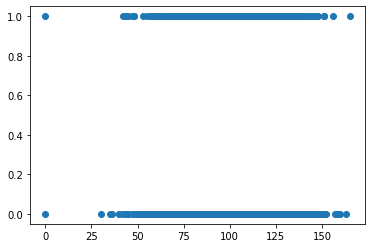

In [17]:
# csv_data.plot(kind = 'bar', x = 'Churn', y = 'Total day minutes', color = 'green')
# plt.title('BarPlot')
# plt.show()
plt.scatter(csv_data['Total day calls'], csv_data['Churn'])
plt.show()

In [18]:
temp = churn_true.groupby('Total day calls')['Total day calls'].value_counts()
temp = pd.DataFrame(temp)
x = csv_data.groupby('Churn')['Total day calls'].value_counts()
x = pd.DataFrame(x)
x.iloc(0)

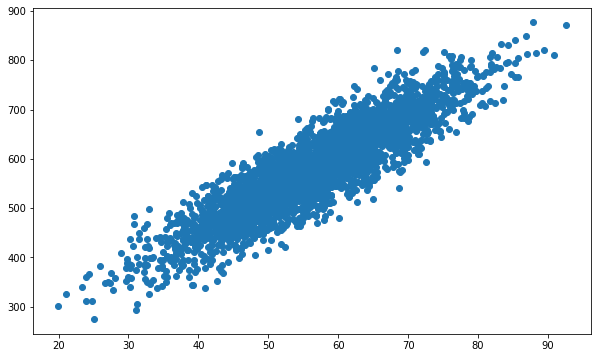

In [19]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(csv_data['total_charges'], csv_data['total_minutes'])
plt.show()

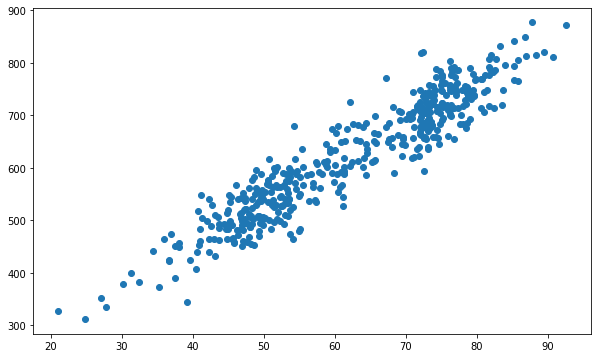

In [20]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(churn_true['total_charges'], churn_true['total_minutes'])
plt.show()

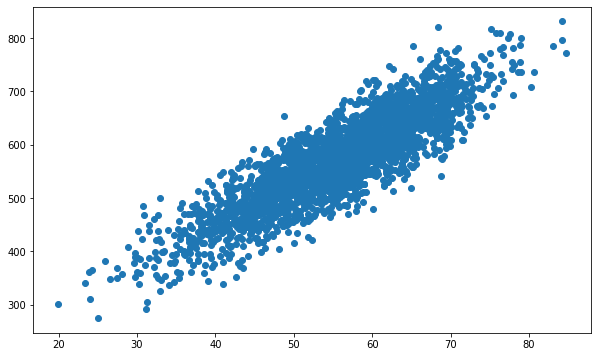

In [21]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(churn_false['total_charges'], churn_false['total_minutes'])
plt.show()

In [22]:
csv_data.groupby(['Area code', 'Churn'])['Area code'].value_counts()

Area code  Churn  Area code
408        False  408           716
           True   408           122
415        False  415          1419
           True   415           236
510        False  510           715
           True   510           125
Name: Area code, dtype: int64

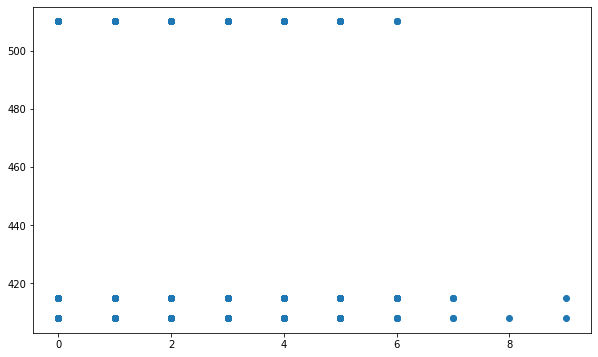

In [23]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(churn_true['Customer service calls'], churn_true['Area code'])
plt.show()

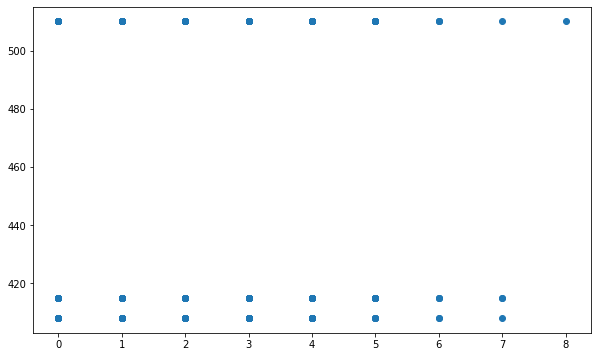

In [24]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(churn_false['Customer service calls'], churn_false['Area code'])
plt.show()

In [25]:
c = churn_true.groupby('Customer service calls')
c.head(500)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charges,total_minutes
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,50.77,566.4
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,90.83,811.3
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True,34.48,441.9
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True,76.49,782.2
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True,52.26,499.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True,71.85,639.0
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True,57.81,591.2
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True,45.89,456.5
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True,85.28,767.1


In [26]:
churn_false.groupby('Customer service calls').describe()

Account length              ... total_minutes       
                                count        mean  ...           75%    max
Customer service calls                             ...                     
0                               605.0  101.550413  ...       634.700  809.2
1                              1059.0  101.386213  ...       630.000  816.6
2                               672.0   99.197917  ...       623.725  820.2
3                               385.0  100.142857  ...       631.700  831.0
4                                90.0  100.333333  ...       650.625  760.9
5                                26.0  109.192308  ...       666.125  766.0
6                                 8.0  100.875000  ...       622.200  676.5
7                                 4.0  125.000000  ...       676.725  686.7
8                                 1.0   64.000000  ...       611.500  611.5

[9 rows x 136 columns]

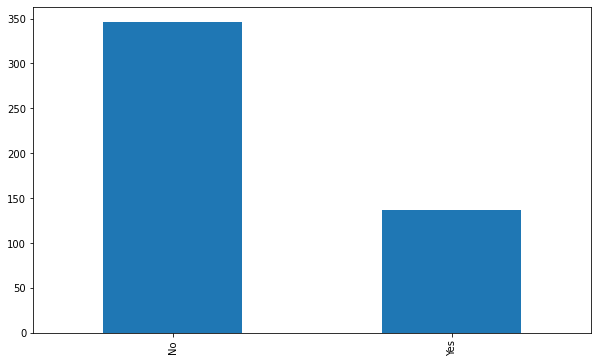

In [27]:
churn_true['International plan'].value_counts().plot(kind = 'bar')

In [28]:
vc_active = churn_true[churn_true['Voice mail plan'] == 'Yes']
vc_active.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,total_charges,total_minutes
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,104.712500,441.575000,30.887500,176.58500,101.237500,30.020375,202.632500,100.962500,17.224250,193.231250,101.950000,8.695000,11.145000,4.637500,3.009625,2.587500,55.939625,572.448750
std,34.289975,45.169099,7.219863,50.83929,18.483139,8.643009,50.189055,19.773044,4.266139,48.078174,19.187219,2.163443,3.121339,3.040835,0.842378,2.016977,9.730624,84.614005
min,17.000000,408.000000,15.000000,82.30000,59.000000,13.990000,75.300000,56.000000,6.400000,82.300000,49.000000,3.700000,4.100000,1.000000,1.110000,0.000000,36.710000,406.200000
25%,80.000000,408.000000,27.000000,145.85000,89.000000,24.797500,166.975000,90.750000,14.197500,165.200000,85.000000,7.432500,8.950000,2.750000,2.417500,1.000000,48.612500,507.575000
50%,105.500000,415.000000,31.000000,171.45000,101.000000,29.150000,203.800000,102.000000,17.320000,192.450000,102.500000,8.660000,11.100000,4.000000,3.000000,2.000000,54.325000,569.550000
75%,128.750000,510.000000,35.000000,209.92500,114.250000,35.690000,238.650000,115.250000,20.285000,216.925000,116.000000,9.760000,13.650000,6.000000,3.685000,4.000000,61.260000,616.525000
max,188.000000,510.000000,48.000000,322.40000,147.000000,54.810000,315.400000,136.000000,26.810000,321.200000,145.000000,14.450000,20.000000,20.000000,5.400000,9.000000,88.310000,815.100000


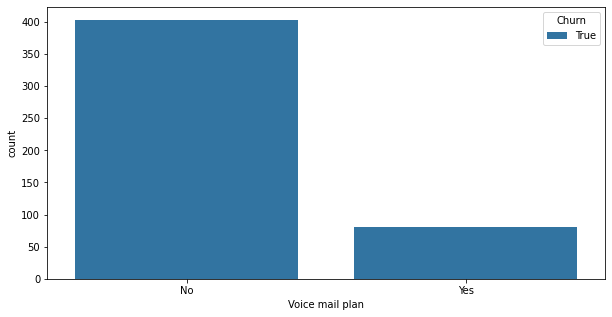

In [29]:
plt.figure(figsize=(10,5))
sb.countplot(x='Voice mail plan', hue='Churn', data=churn_true);